# Importações 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  binom, poisson, expon, norm, t, chi2, f

# Dados

In [2]:
dados_municipio = pd.read_excel('paises.xlsx', sheet_name= 'Goal12')

In [3]:
dados_continete = pd.read_excel('continentes_eletronicos.xlsx', sheet_name= 'Goal12')

In [4]:
dados_municipio

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Nature,Observation Status,Reporting Type,Units
0,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),8,Albania,2013,225638.00049,2013,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
1,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),8,Albania,2014,265438.99536,2014,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
2,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),8,Albania,2015,116221.00067,2015,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
3,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),12,Algeria,2003,5500.00000,2003,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
4,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),12,Algeria,2014,481680.99976,2014,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),834,United Republic of Tanzania,2015,3291.19992,2015,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,Data refer to Moshi and Songea only.,C,A,G,TONNES
494,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),858,Uruguay,2000,0.00000,2000,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
495,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),882,Samoa,2015,70.00000,2015,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES
496,12,12.5,12.5.1,EN_MWT_RCYV,Municipal waste recycled (Tonnes),882,Samoa,2016,542.00000,2016,NaN,NaN,NaN,NaN,UNSTATS / WESR,NaN,NaN,C,A,G,TONNES


In [5]:
dados_continete

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Nature,Reporting Type,Units
0,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),1,World,2010,5554063.00,2010,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
1,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),1,World,2011,5738041.75,2011,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
2,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),1,World,2012,5729046.80,2012,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
3,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),1,World,2013,7436168.86,2013,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
4,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),1,World,2014,7533753.17,2014,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),753,Eastern and South-Eastern Asia,2015,2152504.49,2015,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
187,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),753,Eastern and South-Eastern Asia,2016,2446800.18,2016,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
188,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),753,Eastern and South-Eastern Asia,2017,2565750.38,2017,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES
189,12,12.5,12.5.1,EN_EWT_RCYV,Electronic waste recycling (Tonnes),753,Eastern and South-Eastern Asia,2018,2651050.21,2018,NaN,NaN,NaN,NaN,UNSD / UNU / WESR,NaN,NaN,E,G,TONNES


In [6]:
colunas = ['GeoAreaName', 'TimePeriod', 'Units', 'Value']
dados_pais = dados_municipio[colunas]
dados_continente = dados_continete[colunas]

# Análises

### Países e mundo

- Escolhendo os dados

In [7]:
reciclaveis_ton = dados_pais[dados_pais['Units'] == 'TONNES']
reciclaveis_ton

,GeoAreaName,TimePeriod,Units,Value
0,Albania,2013,TONNES,225638.00049
1,Albania,2014,TONNES,265438.99536
2,Albania,2015,TONNES,116221.00067
3,Algeria,2003,TONNES,5500.00000
4,Algeria,2014,TONNES,481680.99976
...,...,...,...,...
493,United Republic of Tanzania,2015,TONNES,3291.19992
494,Uruguay,2000,TONNES,0.00000
495,Samoa,2015,TONNES,70.00000
496,Samoa,2016,TONNES,542.00000


In [8]:
reciclaveis_ton_cont = reciclaveis_ton[reciclaveis_ton['Value'] > 0].groupby('GeoAreaName').agg(contagem_anos = pd.NamedAgg('TimePeriod', 'count'))
escolha_local = reciclaveis_ton_cont[reciclaveis_ton_cont['contagem_anos'] >= 16]
escolha_local.sort_values(by= 'contagem_anos', ascending= False).head(5)

,contagem_anos
GeoAreaName,
Malaysia,20
Singapore,20
"China, Macao Special Administrative Region",18
Ghana,18
"China, Hong Kong Special Administrative Region",16


- Mundo

In [9]:
reciclaveis_ton_mundo = reciclaveis_ton.groupby('TimePeriod').agg(total_mundo = pd.NamedAgg('Value', 'sum')).reset_index()
reciclaveis_ton_mundo

,TimePeriod,total_mundo
0,2000,4.372086e+06
1,2001,4.953331e+06
2,2002,5.201623e+06
3,2003,8.826494e+06
4,2004,6.543405e+06
5,2005,8.711711e+06
6,2006,8.765628e+06
7,2007,1.038611e+07
8,2008,1.349004e+07
9,2009,1.730230e+07


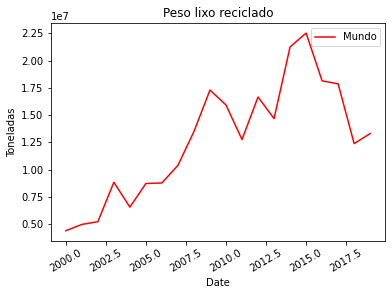

In [10]:
y = reciclaveis_ton_mundo['total_mundo']
x = reciclaveis_ton_mundo['TimePeriod']

plt.plot(x, y, c='red',label='Mundo')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Brasil 


In [11]:
reciclaveis_ton_br = reciclaveis_ton[reciclaveis_ton['GeoAreaName'] == 'Brazil']
reciclaveis_ton_br

,GeoAreaName,TimePeriod,Units,Value
64,Brazil,2004,TONNES,2.207067e+05
65,Brazil,2005,TONNES,3.205013e+05
66,Brazil,2006,TONNES,2.065405e+05
67,Brazil,2007,TONNES,2.730766e+05
68,Brazil,2008,TONNES,2.400817e+06
69,Brazil,2009,TONNES,3.535823e+06
70,Brazil,2010,TONNES,1.185840e+06
71,Brazil,2011,TONNES,4.865437e+05
72,Brazil,2012,TONNES,5.183253e+05
73,Brazil,2013,TONNES,7.755628e+05


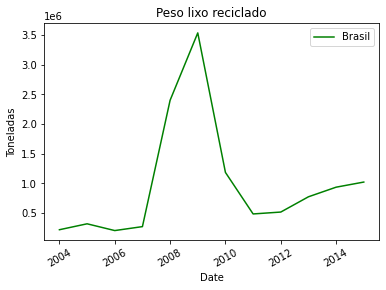

In [12]:
y = reciclaveis_ton_br['Value']
x = reciclaveis_ton_br['TimePeriod']

plt.plot(x, y, c='green',label='Brasil')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Malaysia

In [13]:
reciclaveis_ton_Malaysia = reciclaveis_ton[reciclaveis_ton['GeoAreaName'] == 'Malaysia']
reciclaveis_ton_Malaysia

,GeoAreaName,TimePeriod,Units,Value
296,Malaysia,2000,TONNES,3.188619e+05
297,Malaysia,2001,TONNES,3.363253e+05
298,Malaysia,2002,TONNES,3.547450e+05
299,Malaysia,2003,TONNES,3.741736e+05
300,Malaysia,2004,TONNES,3.946662e+05
301,Malaysia,2005,TONNES,4.162811e+05
302,Malaysia,2006,TONNES,4.390798e+05
303,Malaysia,2007,TONNES,4.631272e+05
304,Malaysia,2008,TONNES,4.884916e+05
305,Malaysia,2009,TONNES,5.152451e+05


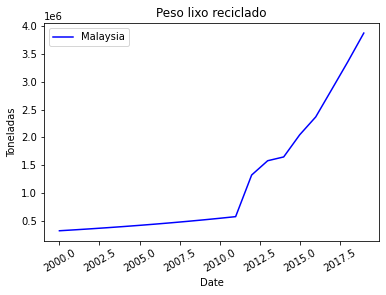

In [14]:
y = reciclaveis_ton_Malaysia['Value']
x = reciclaveis_ton_Malaysia['TimePeriod']

plt.plot(x, y, c='blue',label='Malaysia')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Singapore

In [15]:
reciclaveis_ton_Singapore = reciclaveis_ton[reciclaveis_ton['GeoAreaName'] == 'Singapore']
reciclaveis_ton_Singapore

,GeoAreaName,TimePeriod,Units,Value
413,Singapore,2000,TONNES,1.857300e+06
414,Singapore,2001,TONNES,2.233200e+06
415,Singapore,2002,TONNES,2.183400e+06
416,Singapore,2003,TONNES,2.223200e+06
417,Singapore,2004,TONNES,2.307100e+06
418,Singapore,2005,TONNES,2.469400e+06
419,Singapore,2006,TONNES,2.656900e+06
420,Singapore,2007,TONNES,2.980100e+06
421,Singapore,2008,TONNES,3.296100e+06
422,Singapore,2009,TONNES,3.446200e+06


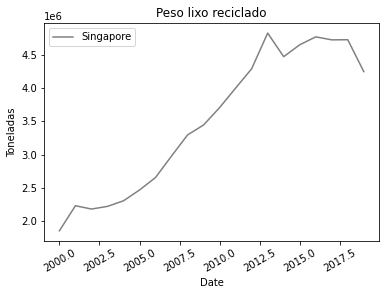

In [16]:
y = reciclaveis_ton_Singapore['Value']
x = reciclaveis_ton_Singapore['TimePeriod']

plt.plot(x, y, c='gray',label='Singapore')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- China (agrupada)

In [17]:
reciclaveis_ton_China = reciclaveis_ton[reciclaveis_ton['GeoAreaName'].isin(['China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region '])]
reciclaveis_ton_China_agrupada = reciclaveis_ton_China.groupby('TimePeriod').agg(Value = pd.NamedAgg('Value', 'sum'))
reciclaveis_ton_China_agrupada

,Value
TimePeriod,
2000,1758000.0
2001,1938000.0
2002,1959000.0
2003,2377000.0
2004,2305000.0
2005,2594000.0
2006,2841000.0
2007,2811000.0
2008,3143000.0


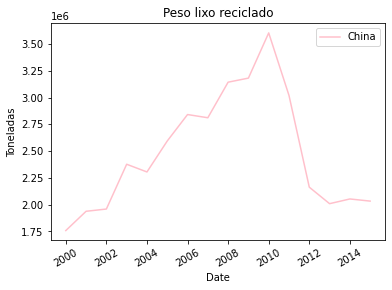

In [18]:
y = reciclaveis_ton_China['Value']
x = reciclaveis_ton_China['TimePeriod']

plt.plot(x, y, c='pink',label='China')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Ghana

In [19]:
reciclaveis_ton_Ghana = reciclaveis_ton[reciclaveis_ton['GeoAreaName'] == 'Ghana']
reciclaveis_ton_Ghana

,GeoAreaName,TimePeriod,Units,Value
167,Ghana,2000,TONNES,33133.96072
168,Ghana,2001,TONNES,34595.72220
169,Ghana,2002,TONNES,54168.39600
170,Ghana,2003,TONNES,55630.93948
171,Ghana,2004,TONNES,58054.47388
172,Ghana,2005,TONNES,68139.36615
173,Ghana,2006,TONNES,71072.55554
174,Ghana,2007,TONNES,77483.29926
175,Ghana,2008,TONNES,84188.40790
176,Ghana,2009,TONNES,90014.70947


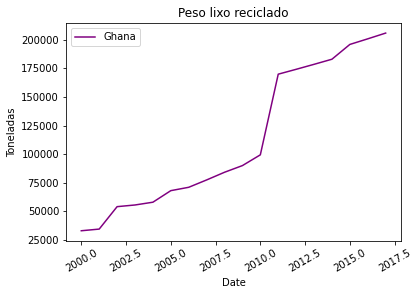

In [20]:
y = reciclaveis_ton_Ghana['Value']
x = reciclaveis_ton_Ghana['TimePeriod']

plt.plot(x, y, c='purple',label='Ghana')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Gráfico comparação países (gráfico linhas)

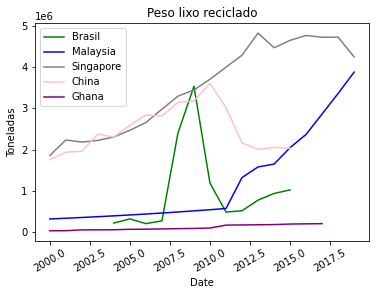

In [21]:
y_Ghana = reciclaveis_ton_Ghana['Value']
x_Ghana = reciclaveis_ton_Ghana['TimePeriod']
y_China = reciclaveis_ton_China['Value']
x_China = reciclaveis_ton_China['TimePeriod']
y_Singapore = reciclaveis_ton_Singapore['Value']
x_Singapore = reciclaveis_ton_Singapore['TimePeriod']
y_Malaysia = reciclaveis_ton_Malaysia['Value']
x_Malaysia = reciclaveis_ton_Malaysia['TimePeriod']
y_br = reciclaveis_ton_br['Value']
x_br = reciclaveis_ton_br['TimePeriod']

plt.plot(x_br, y_br, c='green',label='Brasil')
plt.plot(x_Malaysia, y_Malaysia, c='blue',label='Malaysia')
plt.plot(x_Singapore, y_Singapore, c='gray',label='Singapore')
plt.plot(x_China, y_China, c='pink',label='China')
plt.plot(x_Ghana, y_Ghana, c='purple',label='Ghana')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Gráfico comparação países (gráfico barras)

In [22]:
paises = reciclaveis_ton[reciclaveis_ton['GeoAreaName'].isin(['Ghana', 'Singapore', 'Malaysia', 'Brazil', 'China, Hong Kong Special Administrative Region'])]
paises_agrupados = paises.replace('China, Hong Kong Special Administrative Region', 'China', inplace= True)
paises_agrupados = paises.groupby('GeoAreaName').agg(TotalValue = pd.NamedAgg('Value', 'sum')).reset_index()
paises_agrupados

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,GeoAreaName,TotalValue
0,Brazil,1.188449e+07
1,China,3.978700e+07
2,Ghana,2.033009e+06
3,Malaysia,2.429667e+07
4,Singapore,7.006220e+07


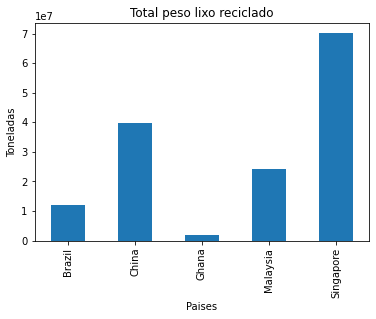

In [23]:
ax = paises_agrupados.plot.bar(x = 'GeoAreaName', y = 'TotalValue', legend=None)
plt.xlabel('Paises')
plt.ylabel('Toneladas')
plt.title('Total peso lixo reciclado')
plt.xticks(rotation=90)
plt.show()

- Normal Reciclagem países

### Comparação dos continetes


In [24]:
reciclaveis_ton_continentes = dados_continente[dados_continente['Units'] == 'TONNES']
reciclaveis_ton_continentes

,GeoAreaName,TimePeriod,Units,Value
0,World,2010,TONNES,5554063.00
1,World,2011,TONNES,5738041.75
2,World,2012,TONNES,5729046.80
3,World,2013,TONNES,7436168.86
4,World,2014,TONNES,7533753.17
...,...,...,...,...
186,Eastern and South-Eastern Asia,2015,TONNES,2152504.49
187,Eastern and South-Eastern Asia,2016,TONNES,2446800.18
188,Eastern and South-Eastern Asia,2017,TONNES,2565750.38
189,Eastern and South-Eastern Asia,2018,TONNES,2651050.21


- Mundo inteiro 


In [25]:
reciclaveis_ton_world = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'World']
reciclaveis_ton_world

,GeoAreaName,TimePeriod,Units,Value
0,World,2010,TONNES,5554063.00
1,World,2011,TONNES,5738041.75
2,World,2012,TONNES,5729046.80
3,World,2013,TONNES,7436168.86
4,World,2014,TONNES,7533753.17
5,World,2015,TONNES,8062395.98
6,World,2016,TONNES,8875938.19
7,World,2017,TONNES,9011045.40
8,World,2018,TONNES,9194734.15
9,World,2019,TONNES,9382133.36


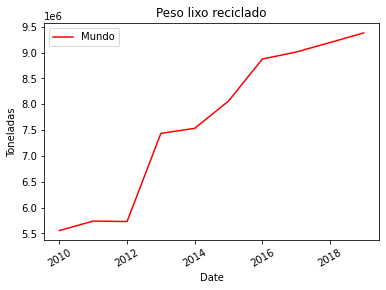

In [26]:
y = reciclaveis_ton_world['Value']
x = reciclaveis_ton_world['TimePeriod']

plt.plot(x, y, c='r',label='Mundo')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- América do Sul

In [27]:
reciclaveis_ton_America_st = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'South America']
reciclaveis_ton_America_st

,GeoAreaName,TimePeriod,Units,Value
10,South America,2012,TONNES,853.76
11,South America,2013,TONNES,12637.51
12,South America,2014,TONNES,14794.31
13,South America,2015,TONNES,23260.86
14,South America,2016,TONNES,17190.52
15,South America,2017,TONNES,24563.51
16,South America,2018,TONNES,24878.00
17,South America,2019,TONNES,25655.48


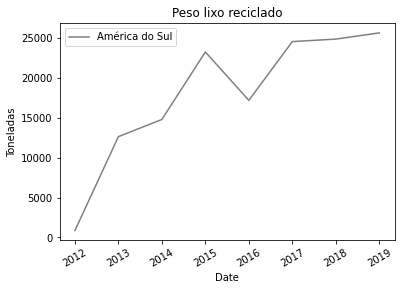

In [28]:
y = reciclaveis_ton_America_st['Value']
x = reciclaveis_ton_America_st['TimePeriod']

plt.plot(x, y, c='gray',label='América do Sul')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- América Central

In [29]:
reciclaveis_ton_America_ct = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'Central America']
reciclaveis_ton_America_ct

,GeoAreaName,TimePeriod,Units,Value
26,Central America,2010,TONNES,30700.00
27,Central America,2011,TONNES,31900.00
28,Central America,2012,TONNES,33760.00
29,Central America,2013,TONNES,35096.11
30,Central America,2014,TONNES,36629.20
31,Central America,2015,TONNES,38135.95
32,Central America,2016,TONNES,39620.88
33,Central America,2017,TONNES,41042.66
34,Central America,2018,TONNES,42378.42
35,Central America,2019,TONNES,43703.80


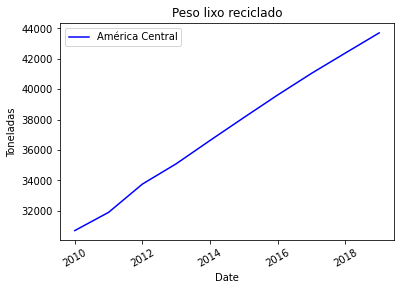

In [30]:
y = reciclaveis_ton_America_ct['Value']
x = reciclaveis_ton_America_ct['TimePeriod']

plt.plot(x, y, c='blue',label='América Central')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Europa

In [31]:
reciclaveis_ton_Europe = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'Europe']
reciclaveis_ton_Europe

,GeoAreaName,TimePeriod,Units,Value
101,Europe,2010,TONNES,3787304.00
102,Europe,2011,TONNES,3821305.00
103,Europe,2012,TONNES,3739788.00
104,Europe,2013,TONNES,3811689.16
105,Europe,2014,TONNES,3863534.62
106,Europe,2015,TONNES,4297649.94
107,Europe,2016,TONNES,4953894.70
108,Europe,2017,TONNES,4997854.07
109,Europe,2018,TONNES,5052173.79
110,Europe,2019,TONNES,5105840.45


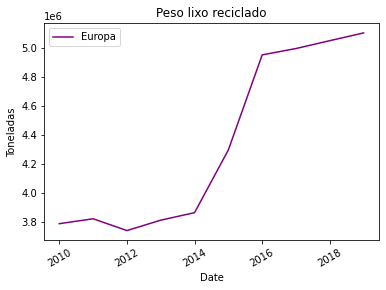

In [32]:
y = reciclaveis_ton_Europe['Value']
x = reciclaveis_ton_Europe['TimePeriod']

plt.plot(x, y, c='purple',label='Europa')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- América do Norte

In [33]:
reciclaveis_ton_America_nt = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'Northern America']
reciclaveis_ton_America_nt

,GeoAreaName,TimePeriod,Units,Value
51,Northern America,2010,TONNES,700100.00
52,Northern America,2011,TONNES,936463.75
53,Northern America,2012,TONNES,1070400.00
54,Northern America,2013,TONNES,1363579.68
55,Northern America,2014,TONNES,1483400.00
56,Northern America,2015,TONNES,1329287.00
57,Northern America,2016,TONNES,1171400.00
58,Northern America,2017,TONNES,1123353.43
59,Northern America,2018,TONNES,1139784.83
60,Northern America,2019,TONNES,1156845.57


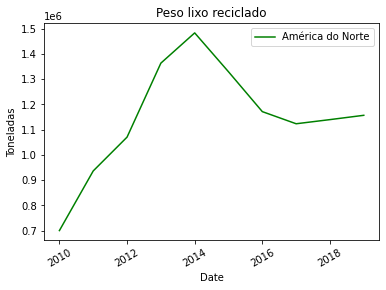

In [34]:
y = reciclaveis_ton_America_nt['Value']
x = reciclaveis_ton_America_nt['TimePeriod']

plt.plot(x, y, c='green',label='América do Norte')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Ásia

In [35]:
reciclaveis_ton_Asia = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'Asia']
reciclaveis_ton_Asia

,GeoAreaName,TimePeriod,Units,Value
94,Asia,2013,TONNES,2024083.00
95,Asia,2014,TONNES,1950565.86
96,Asia,2015,TONNES,2153860.66
97,Asia,2016,TONNES,2452989.12
98,Asia,2017,TONNES,2588260.63
99,Asia,2018,TONNES,2678729.66
100,Asia,2019,TONNES,2790098.82


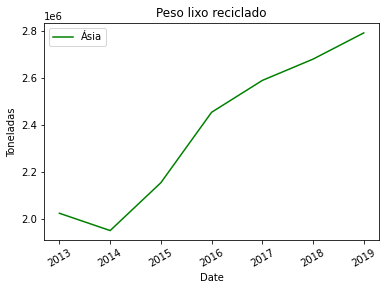

In [36]:
y = reciclaveis_ton_Asia['Value']
x = reciclaveis_ton_Asia['TimePeriod']

plt.plot(x, y, c='green',label='Ásia')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- África

In [37]:
reciclaveis_ton_Africa = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'].isin(['Northern Africa and Western Asia', 'Southern Africa', 'Sub-Saharan Africa'])]
reciclaveis_ton_Africa = reciclaveis_ton_Africa.groupby('TimePeriod').agg(Value = pd.NamedAgg('Value', 'sum')).reset_index()
reciclaveis_ton_Africa

,TimePeriod,Value
0,2010,5379.00
1,2011,9365.00
2,2012,9878.61
3,2013,9968.59
4,2014,10403.69
5,2015,179778.94
6,2016,216838.31
7,2017,209847.34
8,2018,276246.81
9,2019,286451.61


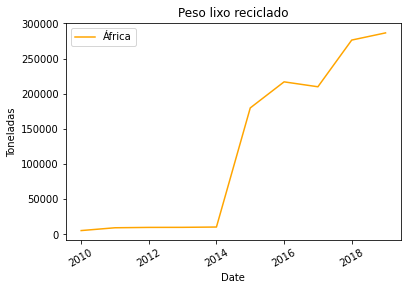

In [38]:
y = reciclaveis_ton_Africa['Value']
x = reciclaveis_ton_Africa['TimePeriod']

plt.plot(x, y, c='orange',label='África')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Oceania

In [39]:
reciclaveis_ton_Oceania = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'] == 'Australia and New Zealand']
reciclaveis_ton_Oceania

,GeoAreaName,TimePeriod,Units,Value
82,Australia and New Zealand,2012,TONNES,41000.00
83,Australia and New Zealand,2013,TONNES,50209.80
84,Australia and New Zealand,2014,TONNES,43000.00
85,Australia and New Zealand,2015,TONNES,54054.81
86,Australia and New Zealand,2016,TONNES,55520.14
87,Australia and New Zealand,2017,TONNES,56642.27
88,Australia and New Zealand,2018,TONNES,57650.00
89,Australia and New Zealand,2019,TONNES,58808.31


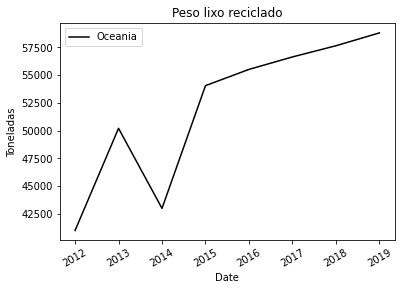

In [40]:
y = reciclaveis_ton_Oceania['Value']
x = reciclaveis_ton_Oceania['TimePeriod']

plt.plot(x, y, c='black',label='Oceania')

plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Gráfico comparação continentes (grásico de linhas)

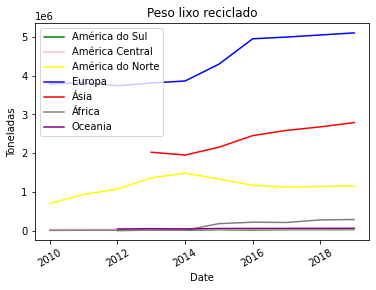

In [41]:
y_America_st = reciclaveis_ton_America_st['Value']
x_America_st = reciclaveis_ton_America_st['TimePeriod']
y_America_ct = reciclaveis_ton_America_ct['Value']
x_America_ct = reciclaveis_ton_America_ct['TimePeriod']
y_America_nt = reciclaveis_ton_America_nt['Value']
x_America_nt = reciclaveis_ton_America_nt['TimePeriod']
y_Europe = reciclaveis_ton_Europe['Value']
x_Europe = reciclaveis_ton_Europe['TimePeriod']
y_Asia = reciclaveis_ton_Asia['Value']
x_Asia = reciclaveis_ton_Asia['TimePeriod']
y_Africa = reciclaveis_ton_Africa['Value']
x_Africa = reciclaveis_ton_Africa['TimePeriod']
y_Oceania = reciclaveis_ton_Oceania['Value']
x_Oceania = reciclaveis_ton_Oceania['TimePeriod']

plt.plot(x_America_st, y_America_st, c='green',label='América do Sul')
plt.plot(x_America_ct, y_America_ct, c='pink',label='América Central')
plt.plot(x_America_nt, y_America_nt, c='yellow',label='América do Norte')
plt.plot(x_Europe, y_Europe, c='blue',label='Europa')
plt.plot(x_Asia, y_Asia, c='red',label='Ásia')
plt.plot(x_Africa, y_Africa, c='grey',label='África')
plt.plot(x_Oceania, y_Oceania, c='purple',label='Oceania')


plt.xlabel("Date")
plt.ylabel("Toneladas")
plt.title('Peso lixo reciclado')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- Gráfico comparação continentes (grásico de linhas)

In [51]:
continetes = reciclaveis_ton_continentes[reciclaveis_ton_continentes['GeoAreaName'].isin(['Central America', 'South America', 'Asia', 'Europe', 'Australia and New Zealand', 'Northern Africa and Western Asia', 'World', 'Northern America'])]
continetes_agrupados = continetes.replace('Australia and New Zealand', 'Oceania', inplace= True)
continetes_agrupados = continetes.replace('Northern Africa and Western Asia', 'África', inplace= True)
continetes_agrupados = continetes.replace('Northern America', 'América do Norte', inplace= True)
continetes_agrupados = continetes.groupby('GeoAreaName').agg(TotalValue = pd.NamedAgg('Value', 'sum')).reset_index()
continetes_agrupados

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,GeoAreaName,TotalValue
0,América do Norte,11474614.26
1,Asia,16638587.75
2,Central America,372967.02
3,Europe,43431033.73
4,Oceania,416885.33
5,South America,143833.95
6,World,76517320.66
7,África,720045.76


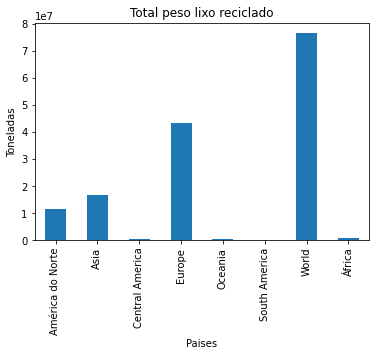

In [52]:
cx = continetes_agrupados.plot.bar(x = 'GeoAreaName', y = 'TotalValue', legend=None)
plt.xlabel('Paises')
plt.ylabel('Toneladas')
plt.title('Total peso lixo reciclado')
plt.xticks(rotation=90)
plt.show()